# Using Quadratic Discriminant Analysis to Optimize an Intraday Momentum Strategy

In this post, we will create a intraday momentum strategy and use QDA as a means of optimizing our strategy. We'll begin by reviewing Linear Discrimnant Analysis or LDA and how it is associated with QDA, gain an understanding of QDA and when we might implement this techinque instead of Linear Discrimnant Analysis. We will then create our intraday momentum strategy using data on the eMini S&P 500 futures and apply our QDA analysis to it to improve our trading strategy.

Let's get started!

# Linear Discriminant Analysis Review

Recall that the purpose of using machine learning techniques is so that we are able to make better inferences and predictions from our data. Thus, the intent of machine learning is analogous to that of implementing a quantitative trading worflow. In quantiative trading our goal is eliminate cognitive biases toward the end of basing our decisions on sound evidence or logic. In other words, our aim is to remove and replace the subjectivity inherent in manual trading with objectivity offered via quantitative trading. Machine learning is a means to achieve this.

Classification is one type of machine learning problem. In a standard classification problem, we have some $\large y$ or response that contains $\large k$ levels or possible classes. We can use quantitative or numerical, qualitatitve or categorical, or a mix of the two data types as our $\large X$, or features to predict the class of our data. In a trading context, an example of a classfication problem is attempting to predict the direction of the next price. In a regression setting, we would attempt to construct a model that would allow us to predict the actual price, or numerical response. So regression problems deal with numerical predictions and classification deals with categorical predictions.

When we implement a machine learning algorithm, we are making an approximation of $\large f(x)$ which is an equation that represents the relationship between $\large X$ or our predictors and $\large y$, our response. Parametric models offer us the advantage of focusing on estimating specific coefficients of an equation rather than estimating the entire equation. This means that instead of trying to compose an entire equation that represents the relationship between our inputs and outputs, we can make some assumptions about our data and structure our model based on an existing equation and solve for the coefficients of that equation. There are pros and cons to such models which we won't go deeply into, but essentially, a model, in order to be effective in providing predictions, needs to reflect or "model" the data in reality. Models have inherent assumptions and if those assumptions are not consistent with reality, the model will have a low accuracy or predictive ability.

Given its name, you might have guessed that LDA assumes linearity.

In LDA we begin with $\large k$ classes that our observations can fall into. The model creates a probability distribution for each $\large k$ class. Unlike Logistic Regression which estimates the probability of an observation being in a specific class directly, LDA uses Bayes Theorem and sorta estimates this posterior probability indirectly.

For example, recall from algebra that the equation for a line is $\large y=mx+b$.

With this equation in hand, we can fit a line to our data simply by estimating $\large m$ and $\large b$, where $\large m$ is the slope or derivative(i.e. rate of change) of $\large y$ given a one unit change in $\large x$ and $\large b$ is the intercept, or the value of $\large y$ when $\large x$ is equal to 0. This equation allows us, given some $\large x$ values, to estimate the coefficients $\large m$ and $\large b$ and make predictions for $\large y$.

This process is similar to that of implementing a parametric model. We have an assumption about how our data is structured, illustrated via our linear equation, and thus we can simply estimate our coefficients to make a prediction.

The equation for LDA is below:

$$ \LARGE \delta_k (x)= \rm x \ { \mu_k \over \sigma^2} - { {\mu_k^2} \over 2\sigma^2} + \log(\pi_k)$$ 

In this equation, we are seeking to estimate $\large \mu$ or the mean of each $\large k$ class, $\large \pi_k$, or the prior probability of the $\large k_{th}$ class and $\large \sigma^2$, or the common covariance matrix between each of the $\large k$ classes. Once we have these coefficients, we can plug them into our equation to make our predictions.

To learn more about LDA, you can read the post entitled "Using Linear Discriminant Analysis for Quantitative Portfolio Management."

# What is Quadratic Discriminant Analysis?

Quadratic Discriminant Analysis is another machine learning classification technique. Like, LDA, it seeks to estimate some coefficients, plug those coefficients into an equation as means of making predictions. LDA and QDA are actually quite similiar. Both assume that the $\large k$ classes can be drawn from Gaussian Distributions. QDA, again like LDA, uses Baye's Theorem to estimate the parameters of the equation. The equation for QDA is below:

$$ \LARGE \delta_k (x)= \rm {-1 \over 2}  (x - \mu_x)^T \rm {\sum_k^{-1}} (x- \mu_k) \rm {-1 \over 2} \rm {\log |{\sum_k}}| + \log{\pi_k}$$ 

which equals :

 $$ \LARGE \delta_k (x)= \rm {-1 \over 2} x^T  \rm {\sum_k^{-1}} x + x^T {\sum_k^{-1}} \mu_k  \rm {-1 \over 2} \mu_k^T \rm {\sum_k^{-1}} \mu_k \rm {-1 \over 2}{\log |{\sum_k}}| + \log{\pi_k}$$ 

So we can see that our QDA equation looks somewhat similar to that of our LDA equation, except that in LDA we estimate $\large \mu_k$, $\large \pi_k$ and $\large \sigma^2$, but in QDA we estimate $\large \mu_k$, $\large \pi_k$, and $\large \sum_k$.

In LDA, we assume that each $\large k_{th}$ class has a shared covariance matrix, $\large \sigma^2$. But in QDA, this assumption has changed and we now assume that each $\large k_{th}$ class has its own covariance matrix, $\large \sum_k$.

Okay, by now you may be thinking, if there are similarities between LDA and QDA, why would we use QDA. Couldn't we just stick to LDA because it's quite obvious that QDA is a bit more involved and incorporates matrix multiplication?

Although LDA and QDA are similar, there exist instances where QDA should be used and may outperform LDA and vice versa. For example, LDA assumes that the $\large k$ classes share a covariance matrix. If this assumption is invalid, then QDA will outperform LDA. Another consideration of the models are their flexibility. The flexibility of a model can be directly translated into a bias-variance tradeoff. The more flexible a model is, the more likely it is to overfit the data and have low bias but high variance. In contrast, the less flexible a model is, the more likely it is to have high bias but low variance, and thus not really resemble the true population.

LDA is a lot less flexible than QDA. LDA will have a high bias, or not be representative of reality, if the assumption of a common covariance matrix is incorrect. If this assumption is correct, it may be better to use LDA for classification versus that of QDA.

Also, the number of features plays an important role in model selection. If there are a lot of predictors, using QDA will be more computationally inefficient than that of LDA. This is because in QDA, you have more parameters to estimate and naturally this grows at some rate based on the number of predictors. QDA may be a better choice if there are a lot of training observations.

# Intraday Momentum Strategy Development

Okay. Now that we've reviewed LDA and QDA, let's layout the framework for developing our intraday momentum strategy. We will use intraday data for the eMini S&P 500 and apply the RSI as our indicator of momentum. Our goal is to construct our strategy, assess its performance, and then improve the performance of our strategy by using Quadratic Discriminant Analysis.

Let's import some of our usual libraries.

In [1]:
#data analysis and manipulation
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Now that we have our initial libraries imported, let's import our data. We will use pandas to read our data in as a csv file.

In [2]:
#initializing our data variable as our eMini data
data=pd.read_csv('ESPostData.csv')

Now that we have our data, let's do some exploratory data analysis on it. We'll start by using the info and describe methods and checking the head of our data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 10 columns):
Date               28027 non-null object
 Time              28027 non-null object
 Open              28027 non-null float64
 High              28027 non-null float64
 Low               28027 non-null float64
 Close             28027 non-null float64
 Volume            28027 non-null int64
 NumberOfTrades    28027 non-null int64
 BidVolume         28027 non-null int64
 AskVolume         28027 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.1+ MB


From applying this method, we can see the types of data in our dataframe as well as the columns. Let's now call the describe method on our data.

In [4]:
data.describe()

,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
count,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000
mean,2733.430888,2734.161674,2732.674305,2733.431825,3234.251365,1264.080137,1612.782674,1621.468691
std,63.420158,63.165082,63.686300,63.418428,6764.764950,2389.889973,3449.191971,3370.833507
min,2531.000000,2533.750000,2529.000000,2531.000000,1.000000,1.000000,0.000000,0.000000
25%,2686.750000,2687.250000,2686.500000,2687.000000,265.000000,126.000000,125.000000,129.000000
50%,2724.500000,2725.250000,2723.750000,2724.500000,759.000000,332.000000,371.000000,374.000000
75%,2784.250000,2784.500000,2783.750000,2784.250000,3307.500000,1265.000000,1613.000000,1668.000000
max,2878.500000,2878.500000,2878.000000,2878.250000,177660.000000,40922.000000,94591.000000,83069.000000


This method gives us some statistical information about our data. We can now check the head of our data.

In [5]:
data.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30


We're going to create a momentum based strategy. We can see that we have data for every 3 minute interval. The volume traded into the bid and the ask may provide some insight into short term momentum. Let's create a delta column, our bid volume minus our ask volume, and compare this to the closing price and see if there is some relationship. We'll first make a copy of our data and then add our delta column.

In [37]:
#making copy of our data 
es=data.copy()

#creating delta column
es['Delta']=es[' BidVolume']-es[' AskVolume']

Now let's recheck the head of our data and create a regression plot.


In [38]:
es.head()


,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,Delta
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672,-72
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48,-42
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430,-125
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184,198
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30,422


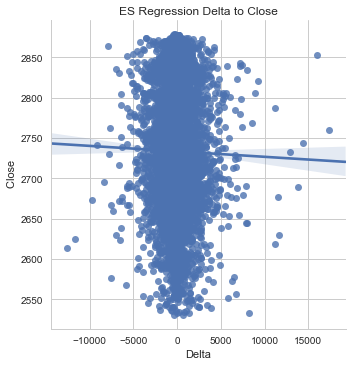

In [8]:
#creating regression plot
sns.lmplot('Delta',' Close',data=es)
plt.title('ES Regression Delta to Close')

Now that we've gotten an idea of the relationship between our delta and closing prices, let's plot a distribution of our delta.

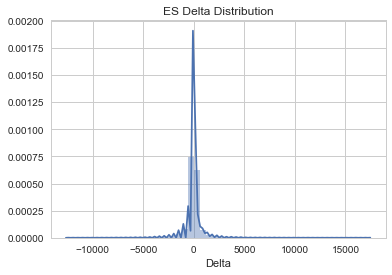

In [9]:
#creating distribution of delta
sns.distplot(es['Delta'])
plt.title('ES Delta Distribution')

Now we'll add a range column to our data and view the relationship between the range of each bar and the delta.

In [39]:
#adding our range column
es['Range']=es[' High']-es[' Low']


In [40]:
#rechecking the head of our data
es.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,Delta,Range
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672,-72,0.50
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48,-42,0.25
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430,-125,0.25
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184,198,0.50
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30,422,0.50


Now we can create a scatter plot of our delta and the range of our data.

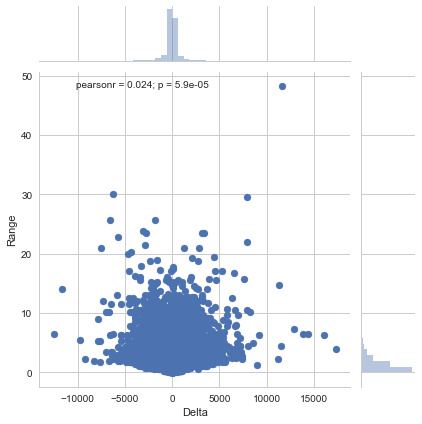

In [12]:
sns.jointplot(es['Delta'], es['Range'])


Now let's take a look at the distribution of the number of trades per bar.

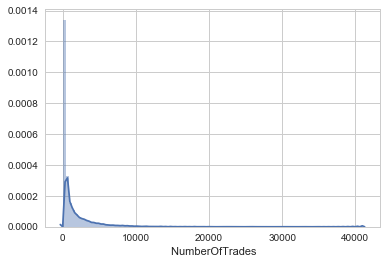

In [13]:
#creating number of trades distribution
sns.distplot(es[' NumberOfTrades'],bins=100)

Now that we've gained some insight into our data from our exploratory data analysis, we're ready to create our intraday momentum strategy using the RSI indicator. We'll wrap our strategy in a class which allows us to create different instances of our strategy without having to rewrite the same logic.

In [41]:
class rsi_strategy(object):
    
    def __init__(self,data,n,data_name,start,end):
                        
            self.data=data #the dataframe
            self.n=n #the moving average
            self.data_name=data_name #the name that will appear on plots
            self.start=start #the beginning date of the sample period
            self.end=end #the ending date of the sample period
                                
        
    
    def generate_signals(self):
        
        
        delta=self.data[' Close'].diff()
        dUp,dDown=delta.copy(),delta.copy()
        dUp[dUp<0]=0
        dDown[dDown>0]=0
        RolUp=dUp.rolling(self.n).mean()
        RolDown=dDown.rolling(self.n).mean()

        #assigning indicator to the dataframe
        self.data['RSI']=np.where(RolDown!=0, RolUp/RolDown,1)
        self.data['RSI_Slow']=self.data['RSI'].rolling(self.n).mean()

        #creating signals
        self.data=self.data.assign(Signal=pd.Series(np.zeros(len(self.data))).values)
        self.data.loc[self.data['RSI']<self.data['RSI_Slow'],'Signal']=1
        self.data.loc[self.data['RSI']>self.data['RSI_Slow'], 'Signal']=-1
            
        return
        
    def plot_performance(self,allocation):
        #intializing a variable for initial allocation
        #to be used to create equity curve
        self.allocation=allocation
               
        #creating returns and portfolio value series
        self.data['Return']=np.log(self.data[' Close']/self.data[' Close'].shift(1))
        self.data['S_Return']=self.data['Signal'].shift(1)*self.data['Return']
        self.data['Market_Return']=self.data['Return'].expanding().sum()
        self.data['Strategy_Return']=self.data['S_Return'].expanding().sum()
        self.data['Portfolio Value']=((self.data['Strategy_Return']+1)*self.allocation)
        
        #creating metrics
        self.data['Wins']=np.where(self.data['S_Return'] > 0,1,0)
        self.data['Losses']=np.where(self.data['S_Return']<0,1,0)
        self.data['Total Wins']=self.data['Wins'].sum()
        self.data['Total Losses']=self.data['Losses'].sum()
        self.data['Total Trades']=self.data['Total Wins'][0]+self.data['Total Losses'][0]
        self.data['Hit Ratio']=round(self.data['Total Wins']/self.data['Total Losses'],2)
        self.data['Win Pct']=round(self.data['Total Wins']/self.data['Total Trades'],2)
        self.data['Loss Pct']=round(self.data['Total Losses']/self.data['Total Trades'],2)
        
        
        
        #Plotting the Performance of the RSI Strategy
    
        plt.plot(self.data['Market_Return'],color='black', label='Market Returns')
        plt.plot(self.data['Strategy_Return'],color='blue', label= 'Strategy Returns')
        plt.title('%s RSI Strategy Backtest'%(self.data_name))
        plt.legend(loc=0)
        plt.tight_layout()
        plt.show()
        
        plt.plot(self.data['Portfolio Value'])
        plt.title('%s Portfolio Value'%(self.data_name))
        plt.show()

Okay. Now let's try out our rsi_strategy class. 

In [42]:
#creating an instance of our strategy class
strat1=rsi_strategy(es,10,'ES',es['Date'][0],es['Date'].iloc[-1])


Now that we have an instance of our RSI strategy, we can now call our generate signals and plot performance methods to see how our strategy performed.

In [43]:
#generating signals
strat1.generate_signals()


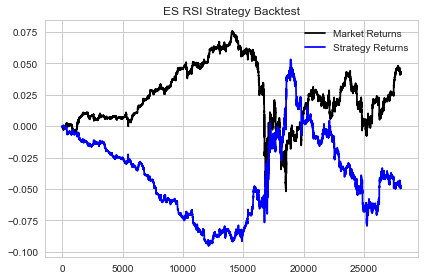

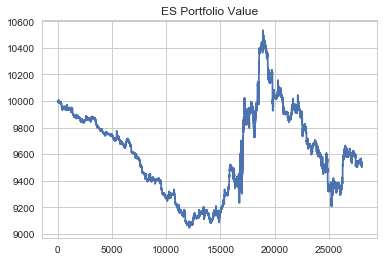

In [44]:
#plotting performance of our strat1 strategy
#passing in an allocation amount of $10,000
strat1.plot_performance(10000)


Now that we have built our strategy, we can check some of its metrics using functionality that we coded into our strategy class. We'll check our Hit Ratio, Win Percentage, and Loss Percentage.

In [45]:
#checking our Hit Ratio
strat1.data['Hit Ratio'][0]


0.93000000000000005

This Hit Ratio shows us that we our strategy currently has less than a 1-to-1 ratio between wins and losses. Let's now check our Win and Loss Percentages.

In [46]:
#checking our win percentage
print('Strategy Win Percentage')
strat1.data['Win Pct'][0]




Strategy Win Percentage


0.47999999999999998

In [47]:
#checking our loss percentage
print('Strategy Loss Percentage')
strat1.data['Loss Pct'][0]


Strategy Loss Percentage


0.52000000000000002

We can also check our total number of wins and losses as well as the total number of trades our strategy took.

In [48]:
#checking total number of wins
strat1.data['Total Wins'][0]

10818

In [49]:
#checking total number of losses
strat1.data['Total Losses'][0]

11613

In [50]:
#checking total number of trades
strat1.data['Total Trades'][0]

22431

At this point we've conducted exploratory data analysis on our data, created our intraday momentum strategy and viewed the metrics of our strategy. Our strategy currently has a Hit Ratio of little less than 1. Our win percentage is approximately 48% and our loss percentage is 52%. At face value, this isn't very impressive. 

How can we improve our strategy so that we actually can profit from it? 

Even though we tend to lose slightly more than we win, if we can effectively eliminate some of our losing trades, we can in turn recalibrate our win/loss percentages and hit ratio. In other words, our winning trades aren't the problem. It's actually better to win 48% of the time than to win some amount less than 48% of time. The problem is that given the distribution of our total trades, we don't win enough. What if we were to virtually eliminate all of our losing trades? We would trade a lot less, but our win percentage would skyrocket and thus allow us to trade our strategy profitably. 

Properly identifying the problem or task is a key skill in any machine learning application. We will use QDA to improve upon our existing strategy. Our objective is to be able to predict when our strategy is likely to take a losing trade before it takes it so that we can eliminate losing trades and thus rebalance our win loss percentages back in our favor. Sounds interesting! Let's get to it!

# Optimizing the Intraday Momentum Strategy Using QDA

Now we will use QDA as a means of improving our intraday momentum strategy. Let's start by importing the necessary libraries from sklearn.

In [51]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

We need a way to determine when we are likely to place a losing trade. Hmmm... How about we add a categorical return column to our data. We can then do a bit of feature engineering and use our QDA classifier to predict the categorical return values. Once we've completed this, we can then test out our idea by feeding our strategy our predictions and seeing if this improves the performance of our strategy.

We'll start by making a copy of our strategy dataframe. Recall, this is the dataframe created when we built our initial implementation of our strategy.

In [52]:
df=strat1.data


Let's check the head of our dataframe.

In [53]:
df.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,...,Strategy_Return,Portfolio Value,Wins,Losses,Total Wins,Total Losses,Total Trades,Hit Ratio,Win Pct,Loss Pct
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672,...,NaN,NaN,0,0,10818,11613,22431,0.93,0.48,0.52
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48,...,0.0,10000.0,0,0,10818,11613,22431,0.93,0.48,0.52
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430,...,0.0,10000.0,0,0,10818,11613,22431,0.93,0.48,0.52
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184,...,0.0,10000.0,0,0,10818,11613,22431,0.93,0.48,0.52
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30,...,0.0,10000.0,0,0,10818,11613,22431,0.93,0.48,0.52


Now let's add our categorial return column.

In [54]:
#adding column to hold direction of returns
df['Return Direction']=np.where(df['Strategy_Return']>0,'Up',np.where(df['Strategy_Return']<0,'Down',"Flat"))

Let's call our head and tail methods on our Return Direction column.

In [55]:
df['Return Direction'].head()

0    Flat
1    Flat
2    Flat
3    Flat
4    Flat
Name: Return Direction, dtype: object

In [56]:
df['Return Direction'].tail()

28022    Down
28023    Down
28024    Down
28025    Down
28026    Down
Name: Return Direction, dtype: object

Now that we have added the Return Direction column we can begin thinking about what features we should use to predict the probability of our strategy making losses. We can use volatility of the underlying as it should have some effect on our strategy. We could also use different lags of volatility to capture the evolution of momentum. We can also use our RSI indicator. Okay. Let's go with these and add them to our dataframe.

You may be wondering why we aren't using our signal generator. We want to train our model in a way that we can apply it to any market environment. At any given time, under a variety of market conditions, our longs and shorts could be distributed differently. For example, if we're in a bull market, we're more likely to get more long than short signals. We're also more likely to have a greater degree of profitability on our long trades versus our short trades. If we train our model to predict our losing trades on our signal generator over this period, it will associate long signals with increasing returns and short signals with decreasing returns. While this may be true at the moment, in the future when we enter a bear market, the model will have high bias and not be predictive of our losing trades.

In [57]:
#adding our features
#creating volatility
strat1.data['Vol']=strat1.data[' Close'].rolling(window=5).std()

#creating lags of volatility
strat1.data['Vol Lag 3']=strat1.data['Vol'].shift(3)
strat1.data['Vol Lag 4']=strat1.data['Vol'].shift(4)
strat1.data['Vol Lag 5']=strat1.data['Vol'].shift(5)



Okay let's pause for a second and make sure we understand what's happening here. We began by conducting some exploratory data analysis on our intraday data. Our goal was to create an intraday trading strategy using the RSI indicator. We built a class that allowed us to create an instance of our momentum strategy. We were'nt so thrilled about our strategy's performance but we did recognize that it had some potential.

Our strategy currently has a win/loss ratio of just under 1. It currently wins 48% of the time and loses 52% of the time. Our premise is that if we can eliminate some of our losing trades, and thus reduce some of the trades that we take, we could shift the probability of our strategy being profitable in our favor. The fact that we only win 48% of the time is not the real issue. If we could only take those trades, while we would cut our total trades in half, we would have a perfect (theoretically) strategy. In other words, we need a quantitative way of improving our strategy so that it can actually be used in production.

In order to achieve our goal, we must be able to predict when our strategy is likely to take a trade that is probable of making a loss. Thus, we created the Return Direction column to track whether we had a win or a losing trade. We needed features that we could use in our model for training that could provide some indication of the probability of losing trades. We chose volatility lags and our RSI and in the above block of code we added volatility and its lags. Notice that we did this on "strat1.data" instead of our "es" dataframe. strat1.data is the dataframe that we created when we made the strat1 instance of our momentum strategy. We're simply calling the "data" dataframe that was created within our class and storing our features in it. The purpose of doing this is because we are optimizing our strat1 momentum strategy which holds our returns. Recall our es dataframe only holds the data that we passed into our strategy.

Once we create our QDA model, we can store its predictions in a copy of our es dataframe and then create a second momentum strategy instance and compare the results. We will need to alter our class a bit so that it will read our predictions before it takes a trade. So essentially, our strategy will only trade when our QDA model predicts that the trade is not likely to be a losing trade.

Now that we have our features, we can initialize our X and y variables and conduct our train test split. Let's make a copy of our strat1.data dataframe and check its head.

In [58]:
#copying our strategy dataframe
df=strat1.data.copy()

In [59]:
#checking the head of our df dataframe
df.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,...,Total Losses,Total Trades,Hit Ratio,Win Pct,Loss Pct,Return Direction,Vol,Vol Lag 3,Vol Lag 4,Vol Lag 5
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672,...,11613,22431,0.93,0.48,0.52,Flat,NaN,NaN,NaN,NaN
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48,...,11613,22431,0.93,0.48,0.52,Flat,NaN,NaN,NaN,NaN
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430,...,11613,22431,0.93,0.48,0.52,Flat,NaN,NaN,NaN,NaN
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184,...,11613,22431,0.93,0.48,0.52,Flat,NaN,NaN,NaN,NaN
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30,...,11613,22431,0.93,0.48,0.52,Flat,0.136931,NaN,NaN,NaN


To ensure that we use all the appropriate columns, let's call the info method on our dataframe.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 33 columns):
Date                28027 non-null object
 Time               28027 non-null object
 Open               28027 non-null float64
 High               28027 non-null float64
 Low                28027 non-null float64
 Close              28027 non-null float64
 Volume             28027 non-null int64
 NumberOfTrades     28027 non-null int64
 BidVolume          28027 non-null int64
 AskVolume          28027 non-null int64
Delta               28027 non-null int64
Range               28027 non-null float64
RSI                 28017 non-null float64
RSI_Slow            28008 non-null float64
Signal              28027 non-null float64
Return              28026 non-null float64
S_Return            28026 non-null float64
Market_Return       28026 non-null float64
Strategy_Return     28026 non-null float64
Portfolio Value     28026 non-null float64
Wins                28027 non-null int32
Lo

Now we can clearly see all of our columns. Our X, or features will be our lags of volatility and RSI and our y or response will be our return direction column. We can now initialize our variables.

In [60]:
#initializing features
X=df[['Vol Lag 3','Vol Lag 4','Vol Lag 5', 'RSI']]

In [61]:
#initialing our response
y=df['Return Direction']

In [62]:
#checking the head of our features
X.head()

,Vol Lag 3,Vol Lag 4,Vol Lag 5,RSI
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


We can now split our data into training and testing sets. We'll import train_test_split from sklearn to do this.

In [26]:
from sklearn.model_selection import train_test_split

Now we're ready to use our train_test_split method.

In [63]:
#initializing training and testing variables
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Now that we have split our data into an 80/20 train test split, we can initialize our QDA model and fit it to our data.

In [64]:
model=QuadraticDiscriminantAnalysis()

Before we fit our training data, we'll need to fill the null values.

In [66]:
#fitting model to our training data
#and filling null values with 0
model.fit(X_train.fillna(0),y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

Now that we have fitted our model, we can use it to make predictions by passing in our X_test data. This data are our features that our model hasn't seen yet. We can then compare the predictions made by our model to the y_test data, or the actual values of our responses

In [203]:
#creating predictions
predictions=model.predict(X_test.fillna(0))

Now we will use our confusion matrix and classification report to assess how well our model did.

In [204]:
#initializing confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Confusion Matrix:
[[4902    6  242]
 [   2    0    0]
 [ 399    0   55]]


In [205]:
#initializing classification report
print('Classification Report')
print(classification_report(y_test,predictions))

Classification Report
             precision    recall  f1-score   support

       Down       0.92      0.95      0.94      5150
       Flat       0.00      0.00      0.00         2
         Up       0.19      0.12      0.15       454

avg / total       0.86      0.88      0.87      5606



Wow! Our model is able to predict losing trades at an accuracy of 92%.

We can now add our predictions back to our es dataframe and then pass it back into our rsi_strategy class to create a strat2 instance and compare our metrics to our strat1 metrics.

Before adding our predictions to our es dataframe, let's recheck it. We'll call the head method on our dataframe.

In [206]:
#rechecking the head of our es data
es.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,Delta,Range,RSI,RSI_Slow,Vol,Vol Lag 3,Vol Lag 4,Vol Lag 5
0,2017/12/12,15:30:00.0,2668.25,2668.75,2668.25,2668.50,1272,242,600,672,-72,0.50,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/12/12,15:33:00.0,2668.50,2668.50,2668.25,2668.50,54,27,6,48,-42,0.25,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/12/12,15:36:00.0,2668.50,2668.75,2668.50,2668.75,735,207,305,430,-125,0.25,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/12/12,15:39:00.0,2668.50,2669.00,2668.50,2668.75,566,120,382,184,198,0.50,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/12/12,15:42:00.0,2668.75,2669.00,2668.50,2668.75,482,64,452,30,422,0.50,NaN,NaN,0.136931,NaN,NaN,NaN


Now let's add our predictions to our es dataframe.

Recall that in order to build our QDA model, we had to do a 80/20 train test split. This means that we trained our model on 80% of our es data and tested it on 20%. This also means that we have predictions for only 20% of our data and thus the length of our predictions will not match the length of our es dataframe.

What we will have to do, given that we know from our classification report and confusion matrix that our model is valid, is fit our model to all of our es data so that we can get predictions for the other 80% of our data and be able to add them to our es dataframe. 

We'll initialize a second predictions variable and pass in our entire X into our model.

In [67]:
#initializing second predictions variable for es dataframe
predictions_2=model.predict(X.fillna(0))

Now we're ready to add our predictions to our es dataframe so that we can pass it into our rsi_strategy.

In [68]:
#adding our QDA model's predictions to our es dataframe
es['Predictions']=predictions_2

Okay, we now have our predictions stored in our es dataframe. Now we can recalibrate our strategy so that if we have a prediction of "Down" or in other words our model predicts a losing trade, we don't trade. Let's add this additional logic to our class.

In [92]:
class optimized_rsi(object):
    
    def __init__(self,data,n,data_name,start,end):
                        
            self.data=data #the dataframe
            self.n=n #the moving average
            self.data_name=data_name #the name that will appear on plots
            self.start=start #the beginning date of the sample period
            self.end=end #the ending date of the sample period
                                
        
    
    def generate_signals(self):
        
        
        delta=self.data[' Close'].diff()
        dUp,dDown=delta.copy(),delta.copy()
        dUp[dUp<0]=0
        dDown[dDown>0]=0
        RolUp=dUp.rolling(self.n).mean()
        RolDown=dDown.rolling(self.n).mean()

        #assigning indicator to the dataframe
        self.data['RSI']=np.where(RolDown!=0, RolUp/RolDown,1)
        self.data['RSI_Slow']=self.data['RSI'].rolling(self.n).mean()

        #creating signals;
        #altering the signal generator by going through our predictions 
        #and reinitializing signals to 0 whose prediction is down
        self.data=self.data.assign(Signal=pd.Series(np.zeros(len(self.data))).values)
        self.data['QDA Signal']=np.zeros(len(self.data))
        
        self.data.loc[self.data['RSI']<self.data['RSI_Slow'],'Signal']=1
        self.data.loc[self.data['RSI']>self.data['RSI_Slow'], 'Signal']=-1
        
        self.data['QDA Signal']=np.where(self.data['Predictions']=="Down",0,self.data['Signal'])
        
                
        return
        
    def plot_performance(self,allocation):
        #intializing a variable for initial allocation
        #to be used to create equity curve
        self.allocation=allocation
               
        #creating returns and portfolio value series
        self.data['Return']=np.log(self.data[' Close']/self.data[' Close'].shift(1))
        #using our signal 2 column to calcuate returns instead of signal 1 column
        self.data['S_Return']=self.data['QDA Signal'].shift(1)*self.data['Return']
        self.data['Market_Return']=self.data['Return'].expanding().sum()
        self.data['Strategy_Return']=self.data['S_Return'].expanding().sum()
        self.data['Portfolio Value']=((self.data['Strategy_Return']+1)*self.allocation)
        
        #creating metrics
        self.data['Wins']=np.where(self.data['S_Return'] > 0,1,0)
        self.data['Losses']=np.where(self.data['S_Return']<0,1,0)
        self.data['Total Wins']=self.data['Wins'].sum()
        self.data['Total Losses']=self.data['Losses'].sum()
        self.data['Total Trades']=self.data['Total Wins'][0]+self.data['Total Losses'][0]
        self.data['Hit Ratio']=round(self.data['Total Wins']/self.data['Total Losses'],2)
        self.data['Win Pct']=round(self.data['Total Wins']/self.data['Total Trades'],2)
        self.data['Loss Pct']=round(self.data['Total Losses']/self.data['Total Trades'],2)
        
        
        
        #Plotting the Performance of the RSI Strategy
    
        plt.plot(self.data['Market_Return'],color='black', label='Market Returns')
        plt.plot(self.data['Strategy_Return'],color='blue', label= 'Strategy Returns')
        plt.title('%s RSI Strategy Backtest'%(self.data_name))
        plt.legend(loc=0)
        plt.tight_layout()
        plt.show()
        
        plt.plot(self.data['Portfolio Value'])
        plt.title('%s Portfolio Value'%(self.data_name))
        plt.show()

Now that we have altered our signal generator to account for our QDA model's predictions, let's initialize our strat2 object and compare our performance to that of our strat1 strategy.

In [93]:
#initializing our strat2 strategy
strat2=optimized_rsi(es,10,'ES',es.iloc[0]['Date'],es.iloc[-1]['Date'])

In [94]:
#generating signals
strat2.generate_signals()

Now that we have our signals based on our QDA model's predictions, we can call our plot_performance method to create our equity curve and then compare the metrics of our two strategy implementations.

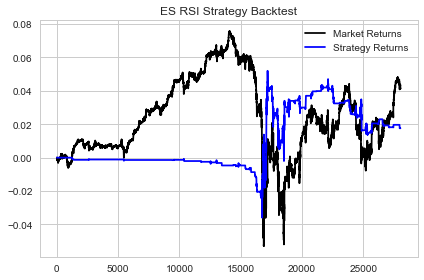

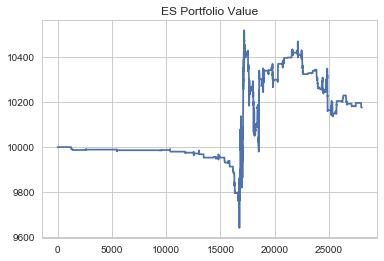

In [95]:
#plotting performance
strat2.plot_performance(10000)

Now that we've have created the second instance of our momentum strategy we can calculate our metrics and compare the two our strat1 strategy.

In [96]:
#generating metrics
strat2_trades=strat2.data['Total Trades'][0]
strat2_hit_ratio=strat2.data['Hit Ratio'][0]
strat2_win_pct=strat2.data['Win Pct'][0]
strat2_loss_pct=strat2.data['Loss Pct'][0]

In [97]:
#printing strat2 metrics
print('Strat 2 Hit Ratio:',strat2_hit_ratio)
print('Strat 2 Win Percentage:',strat2_win_pct)
print('Strat 2 Loss Percentage:',strat2_loss_pct)
print('Strat 2 Total Trades:',strat2_trades)

Strat 2 Hit Ratio: 0.97
Strat 2 Win Percentage: 0.49
Strat 2 Loss Percentage: 0.51
Strat 2 Total Trades: 1323


Let's store recall our strat1 metrics.

In [105]:
#getting strat1 metrics
strat1_trades=strat1.data['Total Trades'][0]
strat1_hit_ratio=strat1.data['Hit Ratio'][0]
strat1_win_pct=strat1.data['Win Pct'][0]
strat1_loss_pct=strat1.data['Loss Pct'][0]


In [106]:
#printing our strat1 metrics
print('Strat 1 Hit Ratio:',strat1_hit_ratio)
print('Strat 1 Win Percentage:',strat1_win_pct)
print('Strat 1 Loss Percentage:',strat1_loss_pct)
print('Strat 1 Total Trades:',strat1_trades)

Strat 1 Hit Ratio: 0.93
Strat 1 Win Percentage: 0.48
Strat 1 Loss Percentage: 0.52
Strat 1 Total Trades: 22431


Okay, something interesting has happened. Recall earlier I stated that the fact that we only win 48% of the time wasn't the issue, the issue was shifting the probability in our favor, and limiting our losing trades. This is why we built our QDA model so that we could predict with a high degree of confidence, when we were likely to take a trade that would result in a loss.

Notice that our metrics have changed slightly. Our strat2 Hit Ratio did improve somewhat and increase to .97 versus .93 for strat1. Our strat2 Win Pct increased to .49 from .48 in strat1 which also corresponds to a Loss Pct of .51 for strat2 and .52 for strat1. Notice the significant difference in the number of trades that we took. We took substantially more trades in our strat1 instance versus that of our strat2 instance.

This directly affects the probability of our strategy making it to production. We effectively eliminated a lot of the trades that posed an issue for our strategy using our QDA model. Also, look at the equity curves of our strat1 and strat2 instances. Our strat1 instance finished the period down at a portfolio value of approximately 9600. Our strat2 instance finished the period up with a portfolio value of 10,200 which is less than its runup but still a significant improvement to that of the strat1 instance.

This is significant given the small change in our Win and Loss Percentages and shows that there are other factors present that play a major role in the profitability of a trading strategy. If you look closely at the end of the period, you can see the true effect of our QDA model. Toward the end of the period during our strat1 instance, we simply sold off in a straight line. But taking a look at our strat2 instance over the same time frame, we actually improved our trading significantly.

Naturally, relative to this strategy, there is a lot more that can be done to build upon what we've learned here. But, this experiment has proven that the framework presented here is a viable one for optimizing intraday trading strategies. Admitedly, the strategy presented in this post was designed to have flaws to test the idea of using QDA for optimization.In other words, I didn't attempt to optimize the strategy and merely wanted one that showed some potential much like strategies you may be working on currently. So imagine what you could do with this framework and a strategy you're actually trying to bring to production.

# Review

We've covered a lot in this post and hopefully you gained insight that can help you in strategy development.

We began by gaining an understanding of what QDA is and took a look at some of the math behind the model. We reviewed what learned in a prior post on LDA and made comparisons to that of QDA. We imported some intraday data on the eMini S&P 500 with the objective of creating an intraday momentum strategy and using QDA to improve our strategy. Before constructing our strategy we did some exploratory data analysis to learn more about our dataset.

We used object oriented programming to design our RSI strategy in a way that would allow us to reuse our code and make multiple strategy instances. After creating our first strategy instance, we saw that our strategy was not production ready, but showed some signs of potential. Our objective was then to build a QDA model to predict when we might take a losing trade prior to us doing so in an effort to shift the probability of our strategy making it to production back in our favor.

We added a categorical column, Return Direction, to our data, and engineered features, Lag 3, 4, and 5 of volatility as well as our RSI to be used in our QDA model. Our QDA model showed a 92% Accuracy for being able to predict losing trades. We then applied our predictions to our data and created a strat2 instance. Though our Win and Loss Percentages changed marginally, our return increased by $600 and our strat2 instance, unlike our strat1 instance, actually finished the period positively.

Our research showed that our Intraday Machine Learning Optimization framework is viable for increasing the probability of bringing our strategies to production. There is a lot more that we can do to improve this strategy but the general idea has been conveyed. 